In [5]:
import pandas as pd

# Load data
dim_districts = pd.read_csv('dataset/dim_districts.csv')
dim_date = pd.read_csv('dataset/dim_date.csv')
fact_stamps = pd.read_csv('dataset/fact_stamps.csv')
fact_transport = pd.read_csv('dataset/fact_transport.csv')
fact_TS_iPASS = pd.read_csv('dataset/fact_TS_iPASS.csv')

# Convert date columns to datetime format
dim_date['month'] = pd.to_datetime(dim_date['month'])
fact_stamps['month'] = pd.to_datetime(fact_stamps['month'])
fact_transport['month'] = pd.to_datetime(fact_transport['month'])
fact_TS_iPASS['month'] = pd.to_datetime(fact_TS_iPASS['month'])


# Merge datasets
df_stamps = fact_stamps.merge(dim_districts, on='dist_code').merge(dim_date, on='month')
df_transport = fact_transport.merge(dim_districts, on='dist_code').merge(dim_date, on='month')
df_iPASS = fact_TS_iPASS.merge(dim_districts, on='dist_code').merge(dim_date, on='month')


# Stamp Registration

                 district  documents_registered_rev
0                Adilabad                1066971491
1    Bhadradri Kothagudem                 824712666
2             Hanumakonda                7927494100
3               Hyderabad               38396743983
4                 Jagtial                1666081307
5                 Jangoan                1329898858
6        Jogulamba Gadwal                 978779682
7               Kamareddy                1396196267
8              Karimnagar                4024475054
9                 Khammam                5606141586
10  Kumurambheem Asifabad                 227462583
11            Mahabubabad                1058624771
12           Mahabubnagar                3186731550
13             Mancherial                1668092668
14                  Medak                1765752735
15     Medchal_Malkajgiri               64071382839
16                 Mulugu                 515528121
17           Nagarkurnool                1358262744
18          

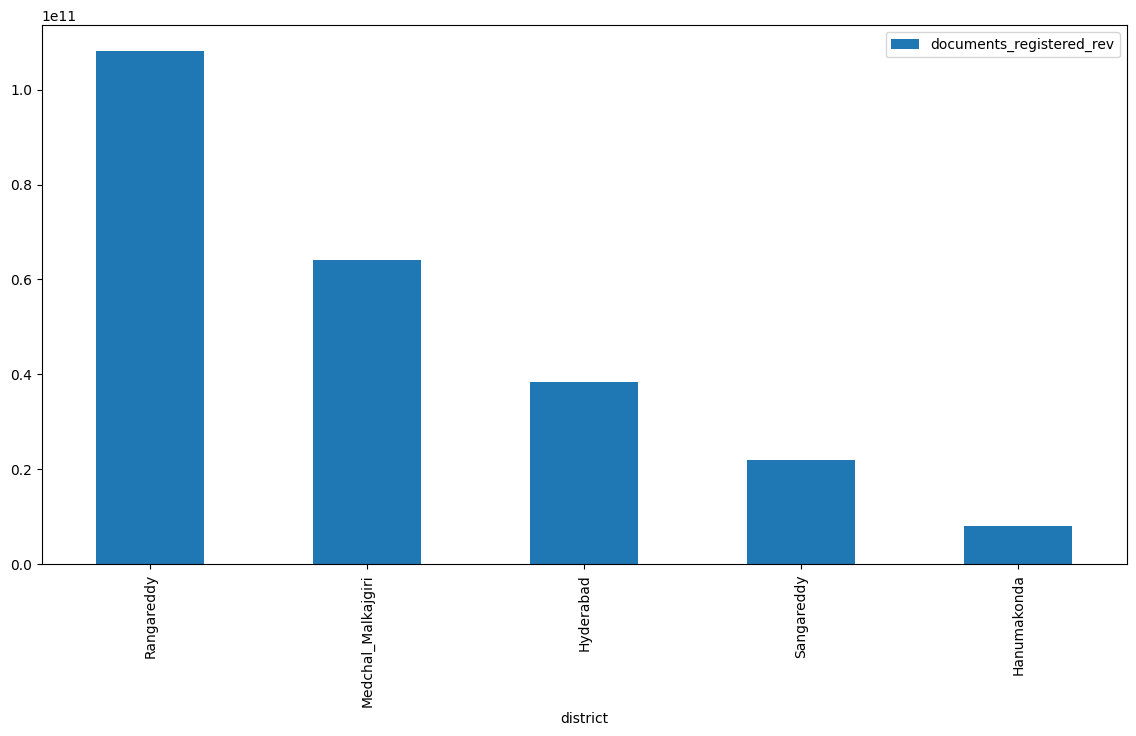

In [6]:
# 1 List down the top 5 districts with the highest revenue growth between FY 2019 and 2022.
import matplotlib.pyplot as plt

revenue = df_stamps.groupby('district')[['documents_registered_rev']].sum().reset_index()
print(revenue)

revenue.set_index('district').nlargest(5,'documents_registered_rev').plot(kind='bar',figsize=(14, 7))
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_26348\2202243130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stamps_2022['estamp_rev'] =stamps_2022['estamps_challans_rev']- stamps_2022['documents_registered_rev']


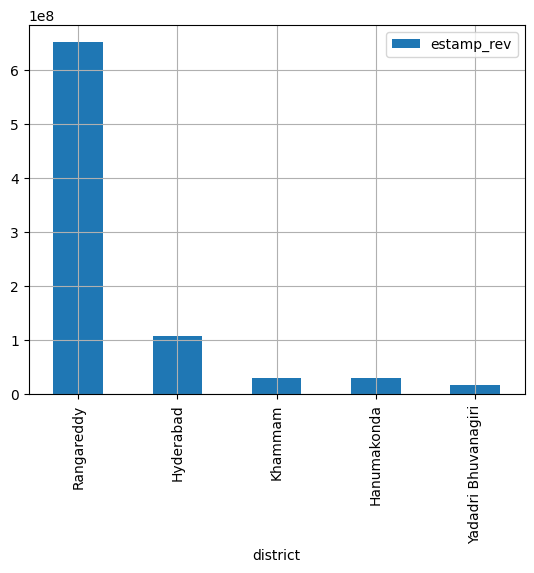

In [7]:
# 2  top 5 districts where e-stamps revenue contributes significantly more to the revenue than the documents in FY 2022

# FY 2022
stamps_2022 = df_stamps[df_stamps['fiscal_year']==2022]

# estamp revenue more than document registration

stamps_2022['estamp_rev'] =stamps_2022['estamps_challans_rev']- stamps_2022['documents_registered_rev']

contri = stamps_2022.groupby('district')['estamp_rev'].sum().reset_index()
contri.set_index('district').nlargest(5,'estamp_rev').plot(kind='bar',grid=True)
plt.show()

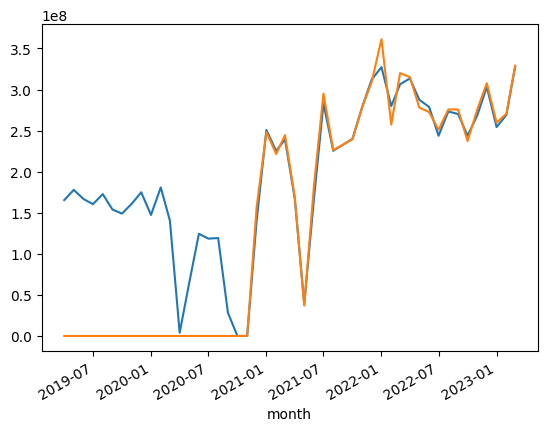

In [8]:
# 3. Is there any alteration of e-Stamp challan count and document registration count pattern since the implementation of e-Stamp challan? If so, what suggestions would you propose to the government?

df_stamps.groupby('month')['documents_registered_rev'].mean().plot()
df_stamps.groupby('month')['estamps_challans_rev'].mean().plot()
plt.show()

In [9]:
# 4. Categorize districts into three segments based on their stamp registration revenue generation during the fiscal year 2021 to 2022.

# FY 2021 to 2022
stamps_filter = df_stamps[df_stamps['fiscal_year'].isin([2021,2022])]
stamps_filter['estamp_rev'] = stamps_filter['estamps_challans_rev']-stamps_filter['documents_registered_rev']
stamps_filter

revenue_2021_2022 = stamps_filter.groupby('district')['estamp_rev'].sum().reset_index()

revenue_2021_2022



C:\Users\Asus\AppData\Local\Temp\ipykernel_26348\1237423497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stamps_filter['estamp_rev'] = stamps_filter['estamps_challans_rev']-stamps_filter['documents_registered_rev']


,district,estamp_rev
0,Adilabad,2076697
1,Bhadradri Kothagudem,6541626
2,Hanumakonda,64623016
3,Hyderabad,290090366
4,Jagtial,9805816
5,Jangoan,13815372
6,Jogulamba Gadwal,2350833
7,Kamareddy,8083166
8,Karimnagar,14873340
9,Khammam,31674802


In [10]:
# Calculate quartiles
Q1 = revenue_2021_2022['estamp_rev'].quantile(0.25)
Q2 = revenue_2021_2022['estamp_rev'].quantile(0.50)  # Median
Q3 = revenue_2021_2022['estamp_rev'].quantile(0.75)

print(f"Q1: {Q1}")
print(f"Q2 (Median): {Q2}")
print(f"Q3: {Q3}")


Q1: 5633070.5
Q2 (Median): 14307361.5
Q3: 21504896.25


In [11]:
# Define categorization function
def categorize_revenue(revenue, Q1, Q2, Q3):
    if revenue <= Q1:
        return 'Low'
    elif revenue <= Q2:
        return 'Medium-Low'
    elif revenue <= Q3:
        return 'Medium-High'
    else:
        return 'High'

# Apply categorization
revenue_2021_2022['segment'] = revenue_2021_2022['estamp_rev'].apply(
    lambda x: categorize_revenue(x, Q1, Q2, Q3)
)

print(revenue_2021_2022)


                 district  estamp_rev      segment
0                Adilabad     2076697          Low
1    Bhadradri Kothagudem     6541626   Medium-Low
2             Hanumakonda    64623016         High
3               Hyderabad   290090366         High
4                 Jagtial     9805816   Medium-Low
5                 Jangoan    13815372   Medium-Low
6        Jogulamba Gadwal     2350833          Low
7               Kamareddy     8083166   Medium-Low
8              Karimnagar    14873340  Medium-High
9                 Khammam    31674802         High
10  Kumurambheem Asifabad    -2836965          Low
11            Mahabubabad     7575978   Medium-Low
12           Mahabubnagar    21360139  Medium-High
13             Mancherial    19444913  Medium-High
14                  Medak    23563460         High
15     Medchal_Malkajgiri    99659681         High
16                 Mulugu     4342972          Low
17           Nagarkurnool     2984464          Low
18               Nalgonda    13

In [12]:
revenue_2021_2022.groupby('segment')['district'].count()

segment
High           8
Low            8
Medium-High    8
Medium-Low     8
Name: district, dtype: int64

# Transportation

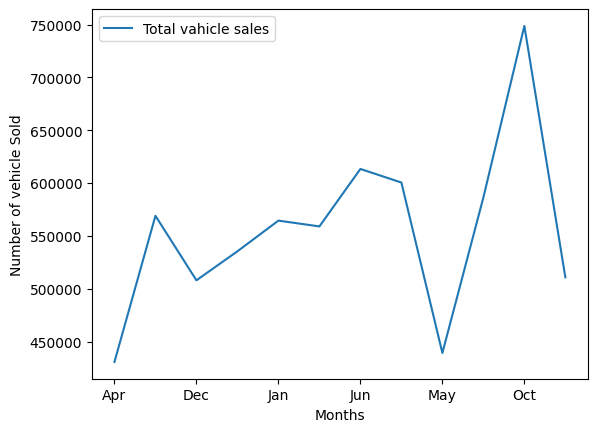

In [13]:
# 5. Investigate whether there is any correlation between vehicle sales and specific months or seasons in different districts. Are there any months or seasons that consistently show higher sale rates, and if yes, what could be the driving factors?
trans_transport['Total vahicle sales']= trans_transport['Brand_new_vehicles']+trans_transport['Pre-owned_vehicles']

corr_veh_sales = trans_transport.groupby('Mmm')['Total vahicle sales'].sum().reset_index()

corr_veh_sales.set_index('Mmm').plot()
plt.xlabel('Months')
plt.ylabel('Number of vehicle Sold')
plt.show()


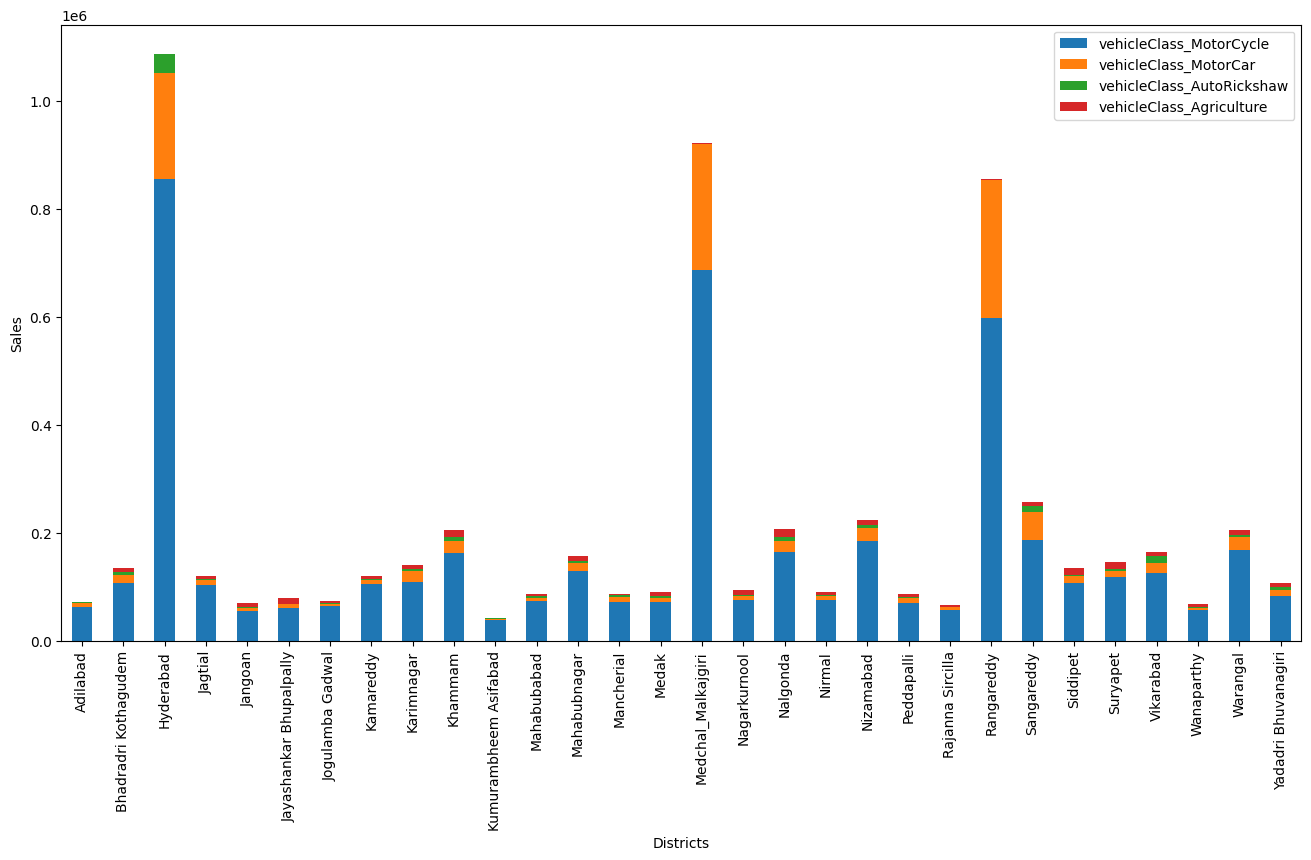

In [14]:
# 6. How does the distribution of vehicles vary by vehicle class (MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different districts? Are there any districts with a predominant preference for a specific vehicle class? Consider FY 2022 for analysis.
vehicle_group = df_transport.groupby('district')[['vehicleClass_MotorCycle',
       'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw',
       'vehicleClass_Agriculture']].sum()

vehicle_group.plot(kind='bar',stacked=True,figsize=(16,8))
plt.xlabel('Districts')
plt.ylabel('Sales')
plt.show()

7. List down the top 3 and bottom 3 districts that have shown the highest 
and lowest vehicle sales growth during FY 2022 compared to FY 
2021? (Consider and compare categories: Petrol, Diesel and Electric)

In [15]:

transport_21 = df_transport[df_transport['fiscal_year']==2021]
transport_22 = df_transport[df_transport['fiscal_year']==2022]

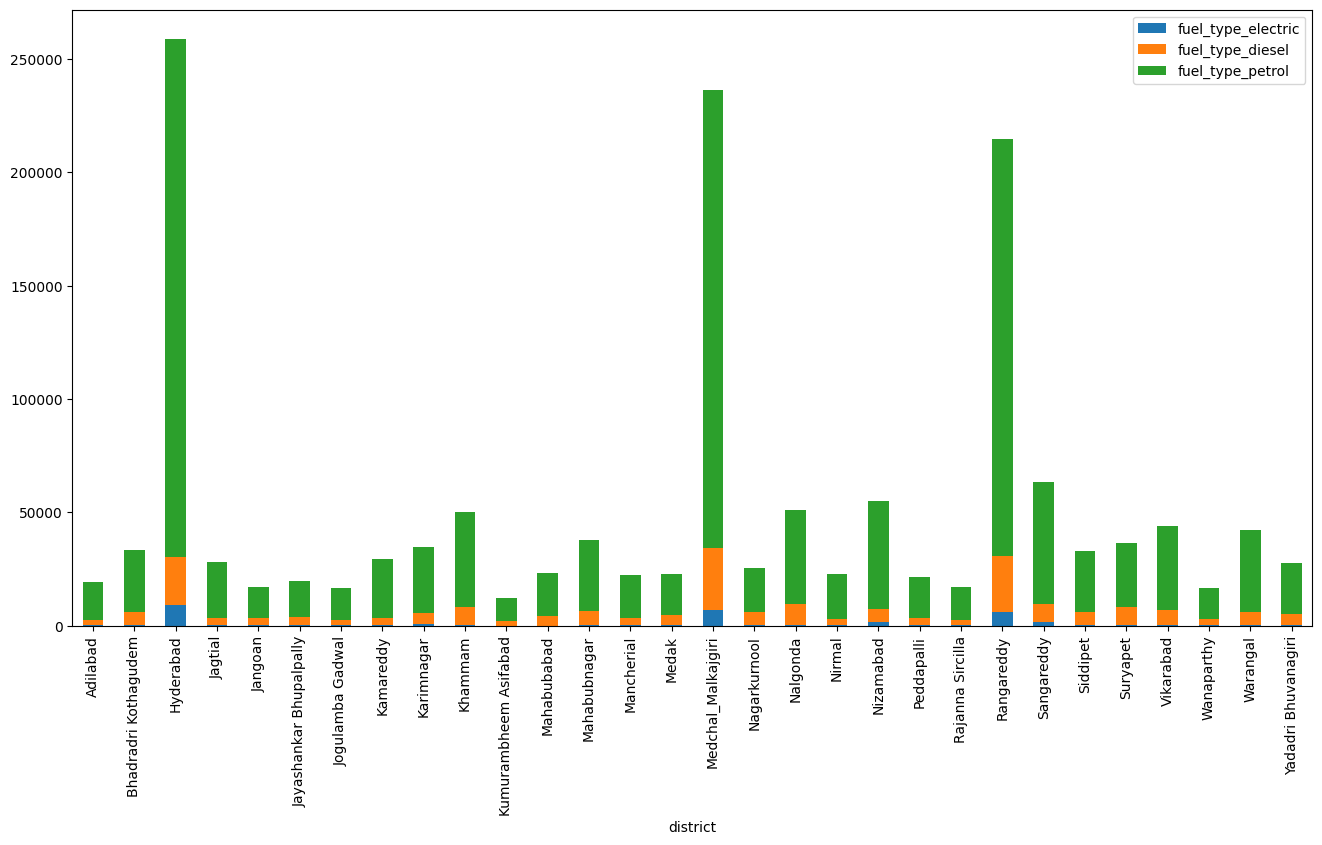

In [16]:
transport_21 = transport_21.groupby('district')[['fuel_type_electric','fuel_type_diesel','fuel_type_petrol']].sum()
transport_21.plot(kind='bar',stacked=True,figsize=(16,8))
plt.show()

In [17]:
transport_22 = transport_22.groupby('district')[['fuel_type_electric','fuel_type_diesel','fuel_type_petrol']].sum()
transport_22

,fuel_type_electric,fuel_type_diesel,fuel_type_petrol
district,,,
Adilabad,333,2523,11212
Bhadradri Kothagudem,290,5712,19331
Hyderabad,20026,20019,231166
Jagtial,642,2261,14836
Jangoan,179,2461,9520
Jayashankar Bhupalpally,227,3169,10274
Jogulamba Gadwal,84,2336,10911
Kamareddy,273,3225,17043
Karimnagar,1132,10644,24574


In [18]:
trans = transport_21.merge(transport_22, on='district', suffixes=['_2021','_2022']).reset_index()
trans['total_2021']= trans['fuel_type_electric_2021']+	trans['fuel_type_diesel_2021']+	trans['fuel_type_petrol_2021']
trans['total_2022']= trans['fuel_type_electric_2022']+	trans['fuel_type_diesel_2022']+	trans['fuel_type_petrol_2022']

trans['difference']= trans['total_2022']-trans['total_2021']



In [19]:
trans[['district','difference']].nlargest(3,'difference')

,district,difference
22,Rangareddy,26905
2,Hyderabad,12270
15,Medchal_Malkajgiri,5243


In [20]:
trans[['district','difference']].nsmallest(3,'difference')

,district,difference
28,Warangal,-18847
19,Nizamabad,-16329
12,Mahabubnagar,-12246


# Ts-Ipass (Telangana State Industrial Project Approval and Self Certification System)


8. List down the top 5 sectors that have witnessed the most significant 
investments in FY 2022.

In [22]:
df_iPASS.columns

Index(['dist_code', 'month', 'sector', 'investment in cr',
       'number_of_employees', 'district', 'Mmm', 'quarter', 'fiscal_year'],
      dtype='object')

In [29]:
ipass=df_iPASS.groupby('district')['investment in cr'].sum()
ipass

district
Adilabad                      0.7630
Bhadradri Kothagudem          8.0200
Hanumakonda                   8.0944
Hyderabad                     1.5000
Jagtial                      13.8728
Jangoan                      14.3986
Jayashankar Bhupalpally       0.9800
Jogulamba Gadwal              3.3764
Kamareddy                    14.9000
Karimnagar                   29.8061
Khammam                      37.8232
Kumurambheem Asifabad         4.1850
Mahabubabad                  16.1023
Mahabubnagar                440.6509
Mancherial                    4.7000
Medak                        59.8532
Medchal_Malkajgiri          475.5943
Mulugu                        0.2800
Nagarkurnool                 18.5575
Nalgonda                     26.3382
Narayanpet                  866.1732
Nirmal                        1.1890
Nizamabad                     5.9438
Peddapalli                    5.4643
Rajanna Sircilla             11.6700
Rangareddy                 1919.1634
Sangareddy                 38

In [31]:
ipass.sort_values(ascending=False).head()

district
Sangareddy            3847.0294
Rangareddy            1919.1634
Narayanpet             866.1732
Medchal_Malkajgiri     475.5943
Mahabubnagar           440.6509
Name: investment in cr, dtype: float64